import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

Set start and end time. It is one year by default

In [150]:
end = datetime.date.today()
start = end - datetime.timedelta(365)


function to calculate MA and EMA

In [151]:
def caculateEMA(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) +
                   ema[-1] * (1 - (smoothing / (1 + days))))
    return [None]*(days-1)+ema


def caculateMA(prices, days):
    return prices.rolling(days).mean()


Process the data frame

In [152]:
def addMAData(prices_df):
    prices_df['MA20'] = caculateMA(prices_df['Close'], 20)
    prices_df['MA60'] = caculateMA(prices_df['Close'], 60)
    prices_df['MA120'] = caculateMA(prices_df['Close'], 120)
    prices_df['EMA20'] = caculateEMA(prices_df['Close'], 20)
    prices_df['EMA60'] = caculateEMA(prices_df['Close'], 60)
    prices_df['EMA120'] = caculateEMA(prices_df['Close'], 120)


def plotMAData(prices_df):
    prices_df['Close'].plot(figsize=(15, 7), label='Close', c='black')
    prices_df['MA20'].plot(label='MA20', c='red', linestyle='dashed')
    prices_df['EMA20'].plot(label='EMA20', c='red')
    prices_df['MA60'].plot(label='MA60', c='orange', linestyle='dashed')
    prices_df['EMA60'].plot(label='EMA60', c='orange')
    prices_df['MA120'].plot(label='MA120', c='blue', linestyle='dashed')
    prices_df['EMA120'].plot(label='EMA120', c='blue')
    plt.legend()


In [153]:
def getStockDate(name):
    stock = web.DataReader(name,'yahoo',start,end)
    addMAData(stock)
    

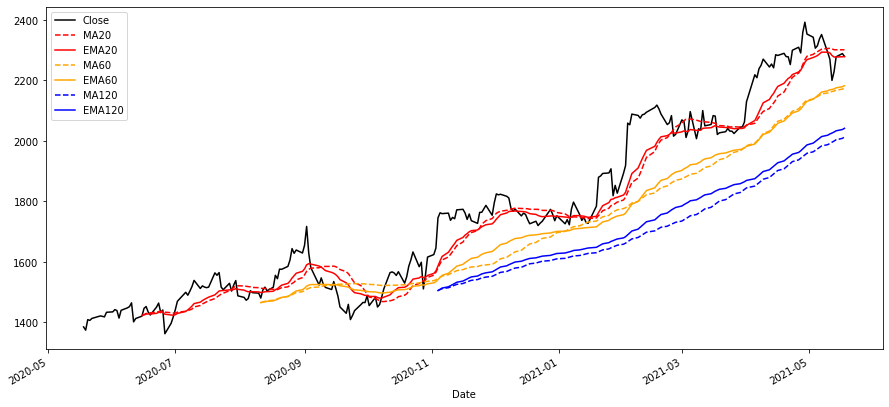

In [154]:
google = web.DataReader('GOOGL', 'yahoo', start, end)
addMAData(google)
plotMAData(google)


In [155]:

apple = web.DataReader('AAPL', 'yahoo', start, end)
addMAData(apple)


In [156]:
def caculateOneDayPriceScore(prices):
    score = 0
    fullScore=120
    priceToday = prices.iloc[-1]
    price20 = prices.iloc[-20]
    price60 = prices.iloc[-60]
    price120 = prices.iloc[-120]
    if priceToday['Close'] >= priceToday['EMA120']:
        score += 30
    if priceToday['Close'] >= priceToday['EMA60']:
        score += 20
    if priceToday['Close'] >= priceToday['EMA20']:
        score += 10
    if priceToday['Close'] >= price20['Close']:
        score += 30
    if priceToday['Close'] >= price60['Close']:
        score += 20
    if priceToday['Close'] >= price120['Close']:
        score += 10
    return score*100/fullScore

def caculateOneDayMAScore(oneDayPrices):
    score=0
    fullScore=120
    if oneDayPrices['EMA20'] > oneDayPrices['EMA120']:
        score+=30
    if oneDayPrices['MA20'] > oneDayPrices['MA120']:
        score+=30
    if oneDayPrices['EMA20'] > oneDayPrices['EMA60']:
        score+=20
    if oneDayPrices['MA20'] > oneDayPrices['MA60']:
        score+=20
    if oneDayPrices['EMA60'] > oneDayPrices['EMA120']:
        score+=10
    if oneDayPrices['MA60'] > oneDayPrices['MA120']:
        score+=10
    return score*100/fullScore

def caculateMAScore(pricesDF):
    score = []
    for index, row in pricesDF.iterrows():
        score.append(caculateOneDayMAScore(row))
    return score

def addMAScore(pricesDF):
    pricesDF['MAScore'] = caculateMAScore(pricesDF)
    

In [157]:
for index, row in apple.tail(2).iterrows():
    print(row['Close'])

126.2699966430664
125.58499908447266


In [158]:


caculateMAScore(apple)
addMAScore(apple)
apple.tail(1)

,High,Low,Open,Close,Volume,Adj Close,MA20,MA60,MA120,EMA20,EMA60,EMA120,MAScore
Date,,,,,,,,,,,,,
2021-05-18,126.987801,125.379997,126.559998,125.584999,44854611.0,125.584999,129.781751,126.546917,128.278208,128.239863,128.181349,125.468683,91.666667
